In [1]:
import numpy as np

In [20]:
def diagrama_antena_direcional(comp_onda, ang_fora_do_eixo):
    """
    Calcula o ganho da antena receptora fora do eixo de acordo com a Recomendação ITU-R F.1245.

    Parâmetros:
    - comp_onda: Comprimento de onda (em metros).
    - ang_fora_do_eixo: Ângulo fora do eixo (em graus), pode ser um valor escalar ou um array.

    Retorno:
    - Ganho da antena fora do eixo (em dBi), como um valor escalar ou array.
    """
    # Garantir que ang_fora_do_eixo seja um array
    ang_fora_do_eixo = np.asarray(ang_fora_do_eixo)

    Gmax = 32  # ganho máximo da antena, em dBi
    gmax = 10 ** (Gmax / 10)
    ef = 0.55  # eficiência da antena da estação terrestre
    # diâmetro da antena, em metros
    D = (comp_onda / np.pi) * np.sqrt(gmax / ef)
    # ganho do primeiro lóbulo lateral da antena
    G1 = 2 + 15 * np.log10(D / comp_onda)
    Fi_m = (20 * comp_onda / D) * np.sqrt(Gmax - G1)  # em graus

    # Inicializa o ganho com zeros
    ganho = np.zeros_like(ang_fora_do_eixo, dtype=float)

    # Intervalo de ângulos e cálculo de ganho
    ganho[(ang_fora_do_eixo >= 0) & (ang_fora_do_eixo < Fi_m)] = \
        Gmax - 2.5 * 20 ** -3 * \
        (D * ang_fora_do_eixo[(ang_fora_do_eixo >= 0) &
         (ang_fora_do_eixo < Fi_m)] / comp_onda) ** 2
    ganho[(ang_fora_do_eixo >= Fi_m) & (ang_fora_do_eixo < 48)] = \
        39 - 5 * np.log10(D / comp_onda) - 25 * np.log10(
            ang_fora_do_eixo[(ang_fora_do_eixo >= Fi_m) & (ang_fora_do_eixo < 48)])
    ganho[(ang_fora_do_eixo >= 48) & (ang_fora_do_eixo <= 180)] = \
        -3 - 5 * np.log10(D / comp_onda)

    # Retorna um valor escalar se a entrada for escalar, caso contrário, retorna o array
    return ganho.item() if ganho.ndim == 0 else ganho

In [21]:
# Exemplos de uso

ang_fora_do_eixo = 90
ganho = diagrama_antena_direcional(0.03, ang_fora_do_eixo)  # comp_onda de 0.03m (por exemplo)
print(ganho)

ang_fora_do_eixo_vetor = np.linspace(0, 90, 5000)
ganho_vetor = diagrama_antena_direcional(0.03, ang_fora_do_eixo_vetor)  # comp_onda de 0.03m (por exemplo)
print(ganho_vetor)

-9.16334391279372
[32.         31.99997043 31.99988171 ... -9.16334391 -9.16334391
 -9.16334391]


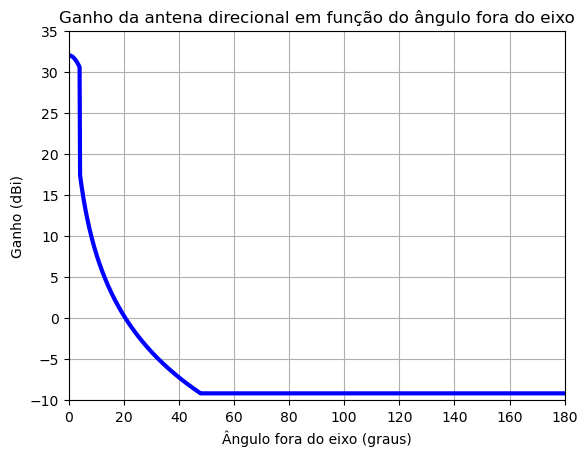

In [22]:
import matplotlib.pyplot as plt
teta = np.linspace(0, 180, 1000)  # Ângulos de 0 a 180 graus
ganho = diagrama_antena_direcional(0.016655136555555554, teta)
plt.plot(teta, ganho, linewidth=3, color='b')
plt.xlabel('Ângulo fora do eixo (graus)')
plt.ylabel('Ganho (dBi)')
plt.title('Ganho da antena direcional em função do ângulo fora do eixo')
plt.xlim(0, 180)
plt.ylim(-10, 35)
plt.grid(True)
plt.show()